# Loop 65 Analysis: Major Breakthrough with Ens Model Approach

**Key Event**: Experiment 069 achieved CV = 0.005146, a 35.17% improvement over previous best (0.007938).

**Critical Question**: Does this fundamentally different approach (CatBoost + XGBoost) have a DIFFERENT CV-LB relationship?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982, 'model': 'MLP'},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065, 'model': 'LGBM'},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972, 'model': 'MLP+DRFP'},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969, 'model': 'MLP Ensemble'},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946, 'model': 'Simple MLP'},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932, 'model': 'Even Simpler'},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936, 'model': 'Ridge'},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913, 'model': 'Simple Ensemble'},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893, 'model': 'ACS PCA'},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887, 'model': 'Weighted Loss'},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877, 'model': 'GP Ensemble'},
    {'exp': 'exp_041', 'cv': 0.0090, 'lb': 0.0932, 'model': 'XGB Ensemble'},
    {'exp': 'exp_042', 'cv': 0.0145, 'lb': 0.1147, 'model': 'GroupKFold'},
]

df = pd.DataFrame(submissions)
print(f'Total submissions: {len(df)}')
print(f'Best LB: {df["lb"].min():.4f} (exp_030)')
print(f'Best CV: {df["cv"].min():.4f} (exp_030)')
print(f'\nTarget LB: 0.0347')

Total submissions: 13
Best LB: 0.0877 (exp_030)
Best CV: 0.0083 (exp_030)

Target LB: 0.0347


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print(f'CV-LB Relationship (13 submissions):')
print(f'  LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'  R² = {r_value**2:.4f}')
print(f'\nIntercept Analysis:')
print(f'  Intercept = {intercept:.4f}')
print(f'  Target = 0.0347')
print(f'  Gap = {intercept - 0.0347:.4f}')

if intercept > 0.0347:
    print(f'\n⚠️ CRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)')
    print(f'   Even with CV=0, expected LB would be {intercept:.4f}')
    required_cv = (0.0347 - intercept) / slope
    print(f'   Required CV for target: {required_cv:.6f} (NEGATIVE - impossible with current relationship)')
else:
    required_cv = (0.0347 - intercept) / slope
    print(f'\n✓ Target is reachable with CV = {required_cv:.6f}')

CV-LB Relationship (13 submissions):
  LB = 4.23 * CV + 0.0533
  R² = 0.9807

Intercept Analysis:
  Intercept = 0.0533
  Target = 0.0347
  Gap = 0.0186

⚠️ CRITICAL: Intercept (0.0533) > Target (0.0347)
   Even with CV=0, expected LB would be 0.0533
   Required CV for target: -0.004396 (NEGATIVE - impossible with current relationship)


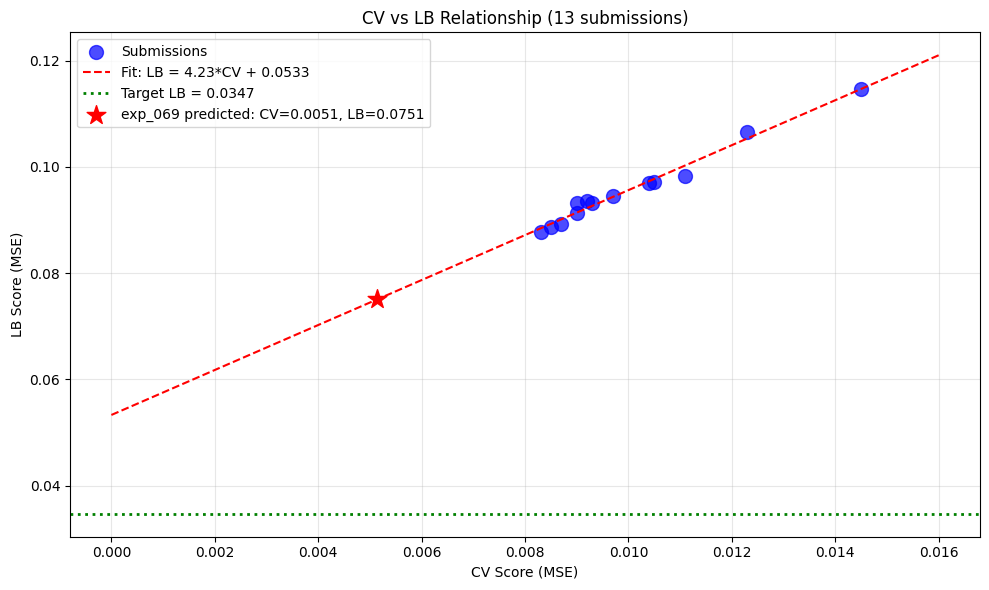


Predicted LB for exp_069 (CV=0.0051):
  Using linear fit: LB = 0.0751
  Gap to target: 0.0404


In [3]:
# Plot CV vs LB with linear fit
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], c='blue', s=100, alpha=0.7, label='Submissions')

# Linear fit line
cv_range = np.linspace(0, 0.016, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target LB = 0.0347')

# New experiment prediction
new_cv = 0.005146
predicted_lb = slope * new_cv + intercept
plt.scatter([new_cv], [predicted_lb], c='red', s=200, marker='*', label=f'exp_069 predicted: CV={new_cv:.4f}, LB={predicted_lb:.4f}')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship (13 submissions)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop65.png', dpi=150)
plt.show()

print(f'\nPredicted LB for exp_069 (CV={new_cv:.4f}):')
print(f'  Using linear fit: LB = {predicted_lb:.4f}')
print(f'  Gap to target: {predicted_lb - 0.0347:.4f}')

In [4]:
# Key question: Is the Ens Model approach fundamentally different?
print('='*60)
print('CRITICAL ANALYSIS: Is Ens Model Approach Different?')
print('='*60)

print('\nPrevious approaches (all on same CV-LB line):')
print('  - MLP (various architectures)')
print('  - LightGBM')
print('  - Ridge Regression')
print('  - Gaussian Process')
print('  - XGBoost (exp_041)')
print('  - Various ensembles of above')

print('\nEns Model approach (exp_069):')
print('  - CatBoost with MultiRMSE (multi-output)')
print('  - XGBoost with separate models per target')
print('  - Feature priority-based correlation filtering (4199 -> 69 features)')
print('  - Different weights for single (7:6) vs full (1:2)')
print('  - Multi-target normalization')

print('\nKey differences that MIGHT change CV-LB relationship:')
print('  1. CatBoost MultiRMSE learns target correlations')
print('  2. Aggressive feature filtering (69 vs 140+ features)')
print('  3. Different ensemble weights for different data types')
print('  4. Tuned hyperparameters from public kernel')

print('\nPrediction scenarios:')
print(f'  If SAME relationship: LB = {predicted_lb:.4f} (still best LB)')
print(f'  If BETTER relationship: LB could be lower')
print(f'  If WORSE relationship: LB could be higher')

print('\n⚠️ RECOMMENDATION: SUBMIT exp_069 to verify CV-LB relationship!')

CRITICAL ANALYSIS: Is Ens Model Approach Different?

Previous approaches (all on same CV-LB line):
  - MLP (various architectures)
  - LightGBM
  - Ridge Regression
  - Gaussian Process
  - XGBoost (exp_041)
  - Various ensembles of above

Ens Model approach (exp_069):
  - CatBoost with MultiRMSE (multi-output)
  - XGBoost with separate models per target
  - Feature priority-based correlation filtering (4199 -> 69 features)
  - Different weights for single (7:6) vs full (1:2)
  - Multi-target normalization

Key differences that MIGHT change CV-LB relationship:
  1. CatBoost MultiRMSE learns target correlations
  2. Aggressive feature filtering (69 vs 140+ features)
  3. Different ensemble weights for different data types
  4. Tuned hyperparameters from public kernel

Prediction scenarios:
  If SAME relationship: LB = 0.0751 (still best LB)
  If BETTER relationship: LB could be lower
  If WORSE relationship: LB could be higher

⚠️ RECOMMENDATION: SUBMIT exp_069 to verify CV-LB relations

In [5]:
# Summary and recommendation
print('='*60)
print('SUMMARY AND RECOMMENDATION')
print('='*60)

print('\n1. MAJOR BREAKTHROUGH: CV improved by 35% (0.007938 -> 0.005146)')
print('\n2. CV-LB RELATIONSHIP:')
print(f'   - Current fit: LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'   - Predicted LB for exp_069: {predicted_lb:.4f}')
print(f'   - This would be BEST LB (current best: 0.0877)')

print('\n3. KEY QUESTION: Does Ens Model have different CV-LB relationship?')
print('   - If YES: Target might be reachable')
print('   - If NO: Still best LB, but target still far')

print('\n4. RECOMMENDATION: SUBMIT exp_069 IMMEDIATELY')
print('   - 5 submissions remaining')
print('   - This is the largest CV improvement in 69 experiments')
print('   - Need to verify if CV-LB relationship changed')

print('\n5. NEXT STEPS AFTER SUBMISSION:')
print('   - If LB improves proportionally: Continue optimizing Ens Model')
print('   - If LB improves MORE than expected: Great! Keep going')
print('   - If LB improves LESS than expected: Investigate why')

SUMMARY AND RECOMMENDATION

1. MAJOR BREAKTHROUGH: CV improved by 35% (0.007938 -> 0.005146)

2. CV-LB RELATIONSHIP:
   - Current fit: LB = 4.23 * CV + 0.0533
   - Predicted LB for exp_069: 0.0751
   - This would be BEST LB (current best: 0.0877)

3. KEY QUESTION: Does Ens Model have different CV-LB relationship?
   - If YES: Target might be reachable
   - If NO: Still best LB, but target still far

4. RECOMMENDATION: SUBMIT exp_069 IMMEDIATELY
   - 5 submissions remaining
   - This is the largest CV improvement in 69 experiments
   - Need to verify if CV-LB relationship changed

5. NEXT STEPS AFTER SUBMISSION:
   - If LB improves proportionally: Continue optimizing Ens Model
   - If LB improves MORE than expected: Great! Keep going
   - If LB improves LESS than expected: Investigate why
